In [ ]:
!jupyter nbconvert --to html "/content/DSBA_Project_ET_EasyVisa_Fullcode.ipynb"

[NbConvertApp] Converting notebook /content/DSBA_Project_ET_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] Writing 2819310 bytes to /content/DSBA_Project_ET_EasyVisa_Fullcode.html


# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.1.4 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Data Overview

- Observations
- Sanity checks

In [ ]:
import pandas as pd  # Import the pandas library
# Import the pandas library#Loading dataset
data=pd.read_csv("EasyVisa.csv")

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


We can see that there are total of 12 columns and 25480 entries rows in the dataset.
The columns' data type are integer (2), float(1), object type(9).
The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using isna() method.

In [ ]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are not any null values

In [ ]:
# Summary of continuous columns
data[['no_of_employees','yr_of_estab','prevailing_wage']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27



- The mean and median value for 'no_of_employees' is approx 5667.04 and 2109.00 respectively
- The mean and median value for 'yr_of_estab' is approx 1979.41 and 1997 respectively
- The mean and median value for 'prevailing_wage' is approx 74455.81 and 70308.21 respectively


In [ ]:
data.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


In [ ]:
#Dropping two columns from the dataframe
data.drop(columns=['case_id'], inplace=True)



We can drop the case id column due to that solely being an identifier of each instance.

In [ ]:
#for catagorical columns
cat_cols=['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','full_time_position','case_status', 'unit_of_wage']


for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)


continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
------------------------------
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
------------------------------
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64
------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Mo

Most fo the candidates are from ASia, have a bachelors, has job experience, requires job training, region of the employment, full time position, and case statis is certified.

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import the pandas library
import seaborn as sns

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Univariate Analysis

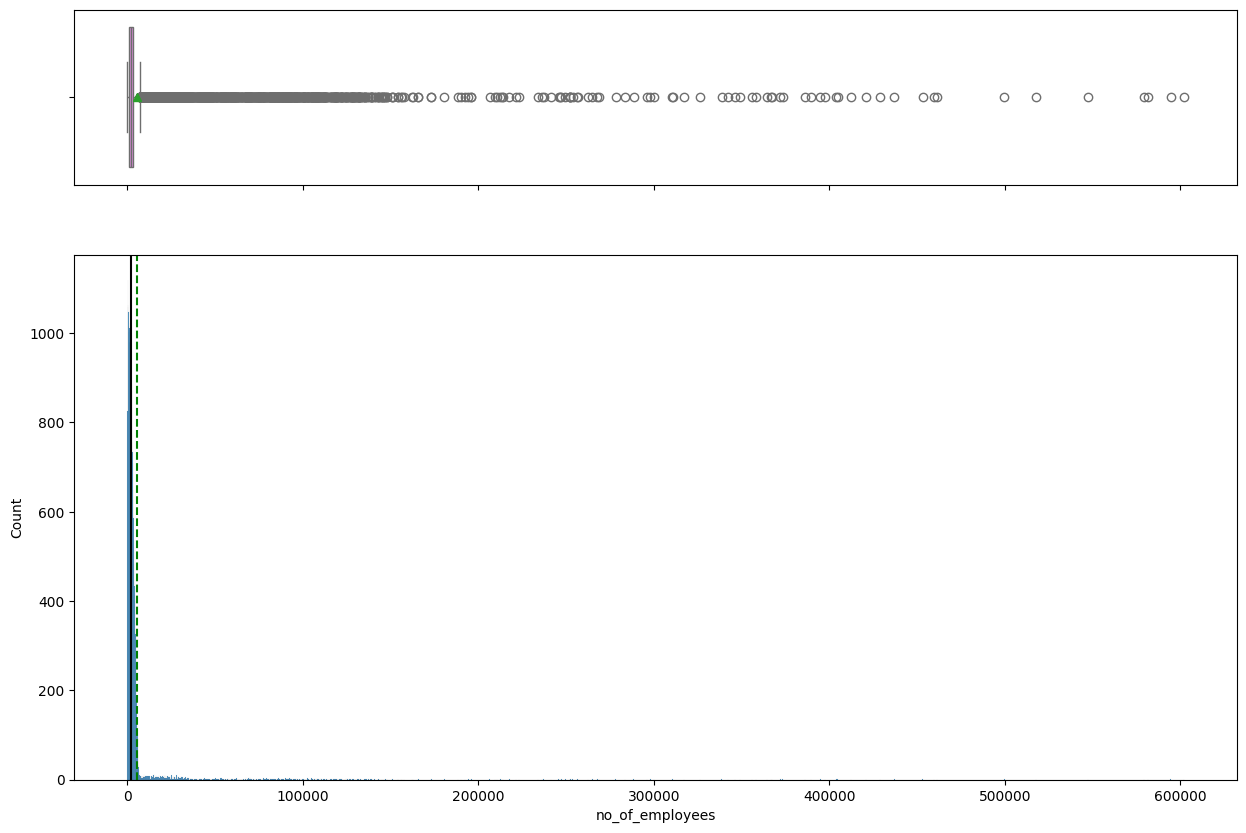

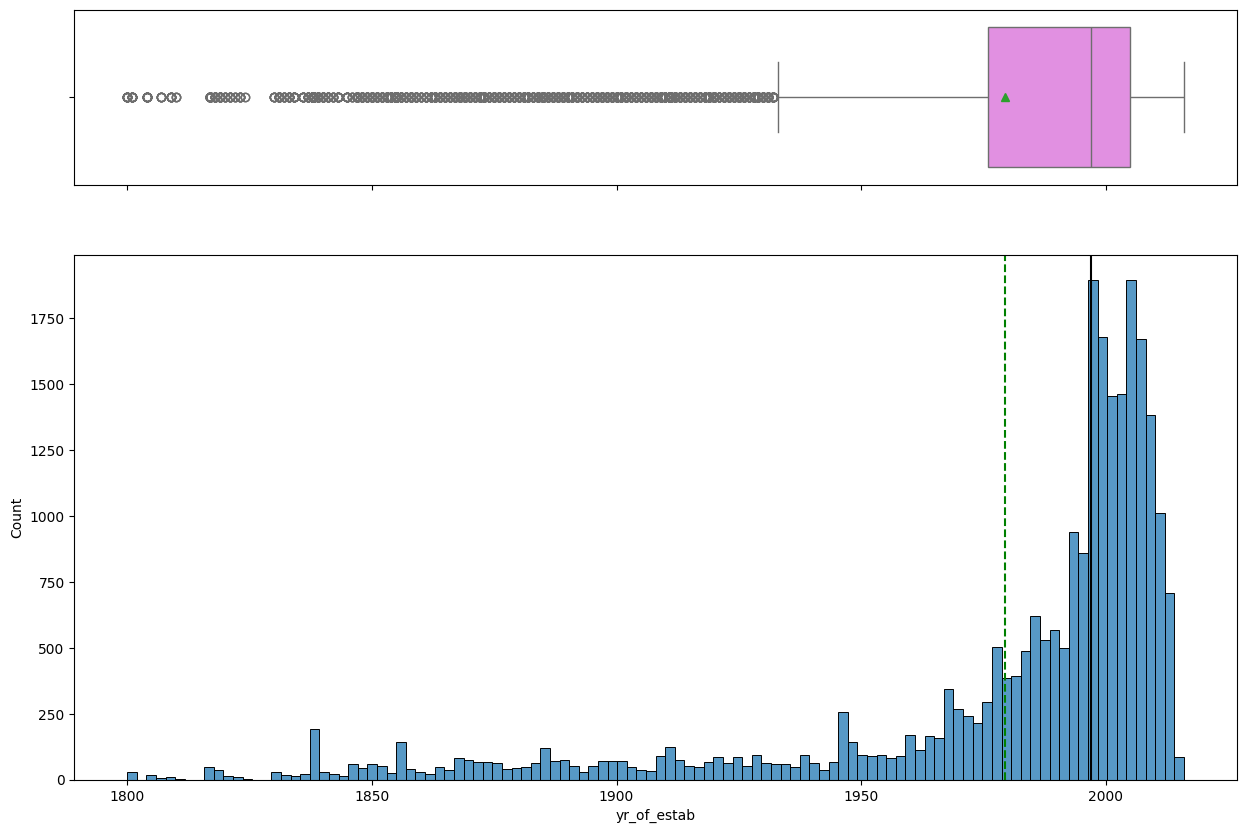

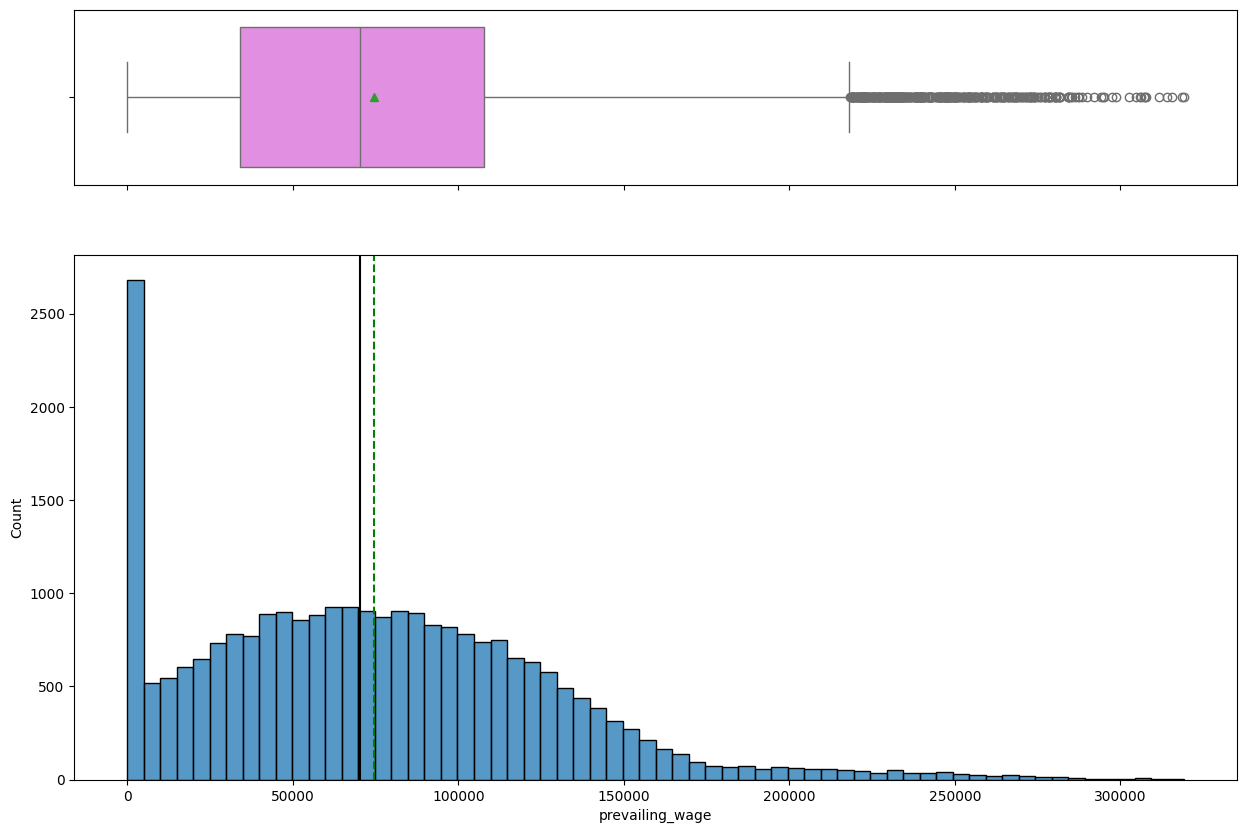

In [ ]:
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        histogram_boxplot(df, column)

Order no_of_employees, yr_of_estab, prevailing_wage

 respectively:
      # Skewed:right, left, right
      # mean relation to median: mean is above, mean is below, mean is above
      # number of outliers relatively: all three have alot of outliers



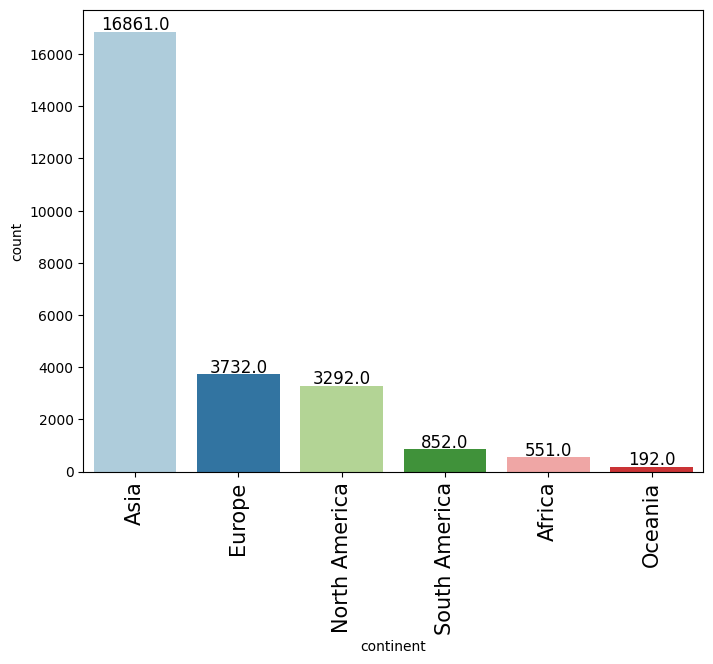

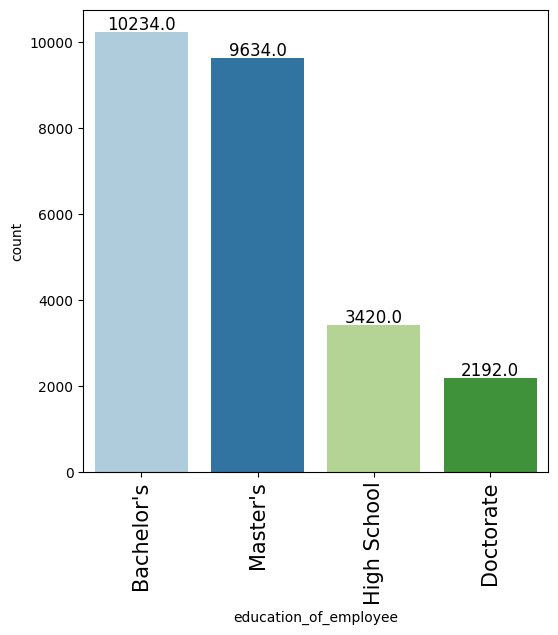

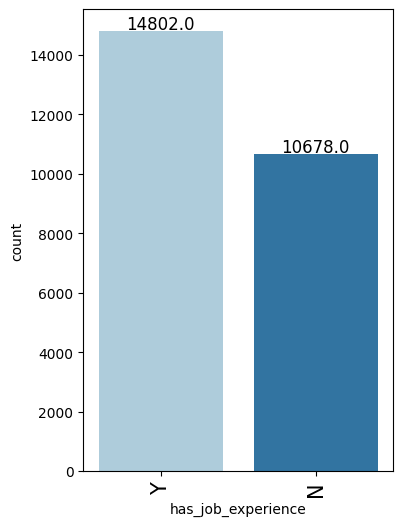

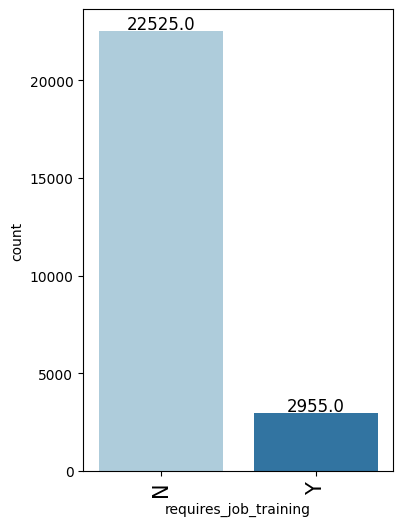

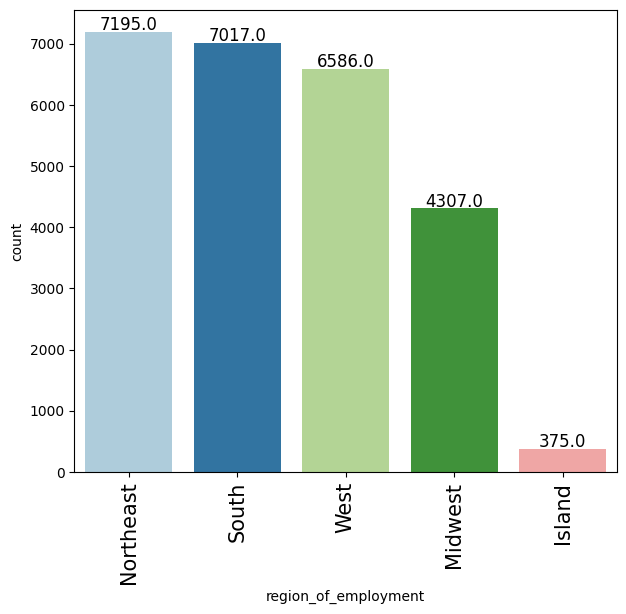

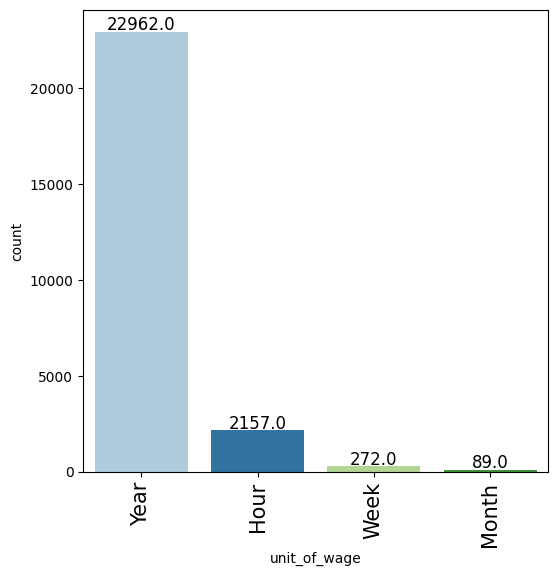

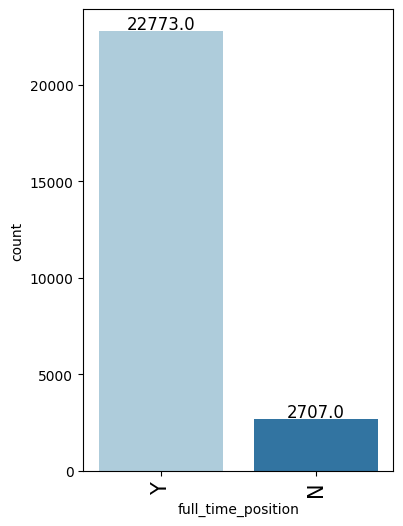

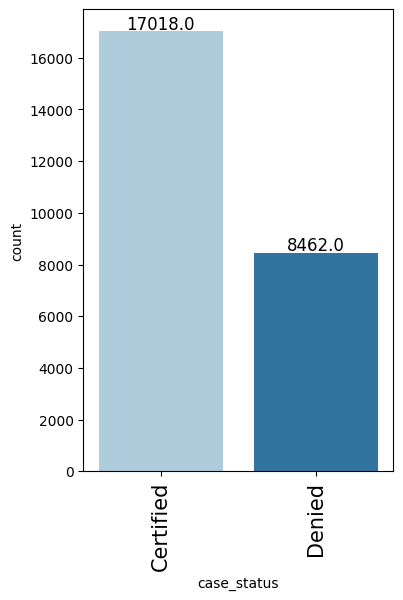

In [ ]:
#catagorical columns
for column in df.columns:
    if not np.issubdtype(df[column].dtype, np.number):
        labeled_barplot(df, column)

# Catagorical Review
### Top three conintients are Asia, Europe, North America
### The order of degrees is Bachelors, Masters, High School and Doctoroate
### Job experience a majority f the candidates do have
### A majority of the candidates do not reqiured job training
### The top three regions of employment are NorthEast, South, and West
### Most of the postions were fulltime positions compared to part time positions
### Most of the cases were approved compared to being approved or denied.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Bivariate Analysis

**Correlation Check**

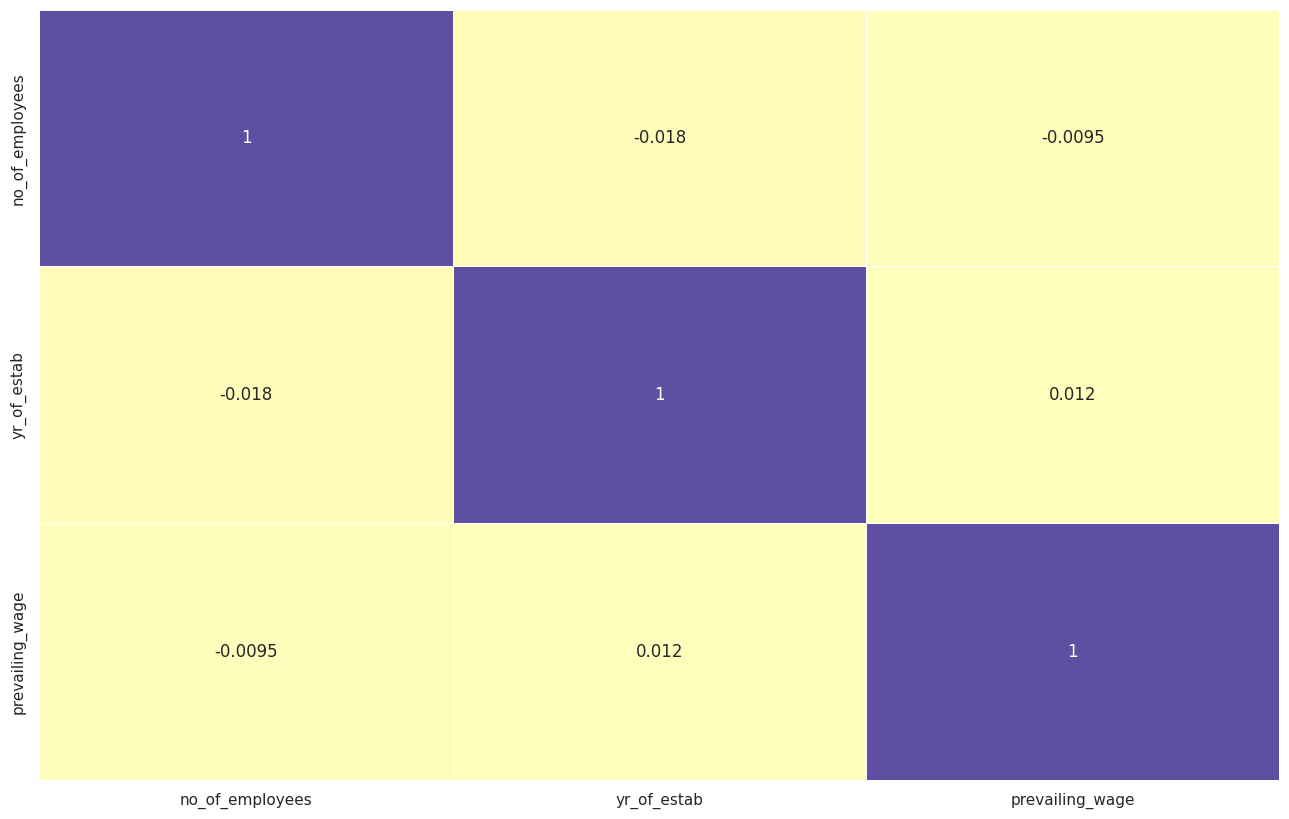

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

There seems to be moderately low correlation for all of the variables so far, with continent Europe and continent North America having the highest correlation out of the chart.

In [ ]:
#adding encoded options to each to check the correlation then
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through each column in the dataframe
for column in df.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(df[column].dtype, np.number):
        # Apply label encoding to the non-numeric column
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
# Verify if the code is to my liking
print(df)

      continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y            44444         2008   
3                         N        

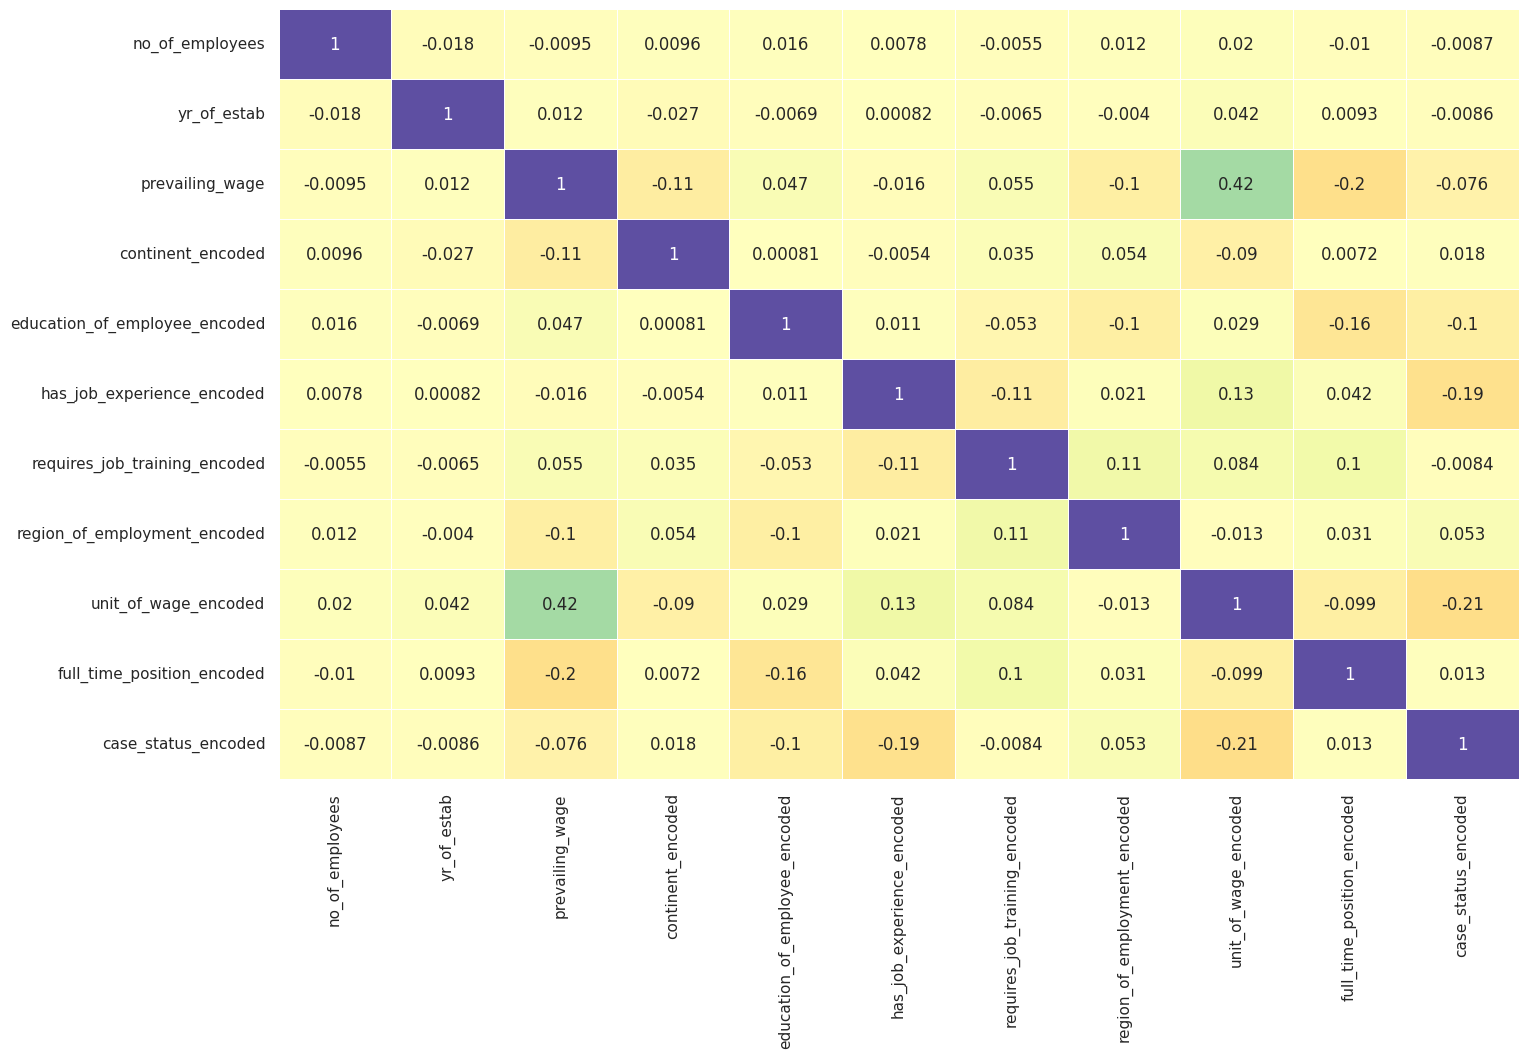

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

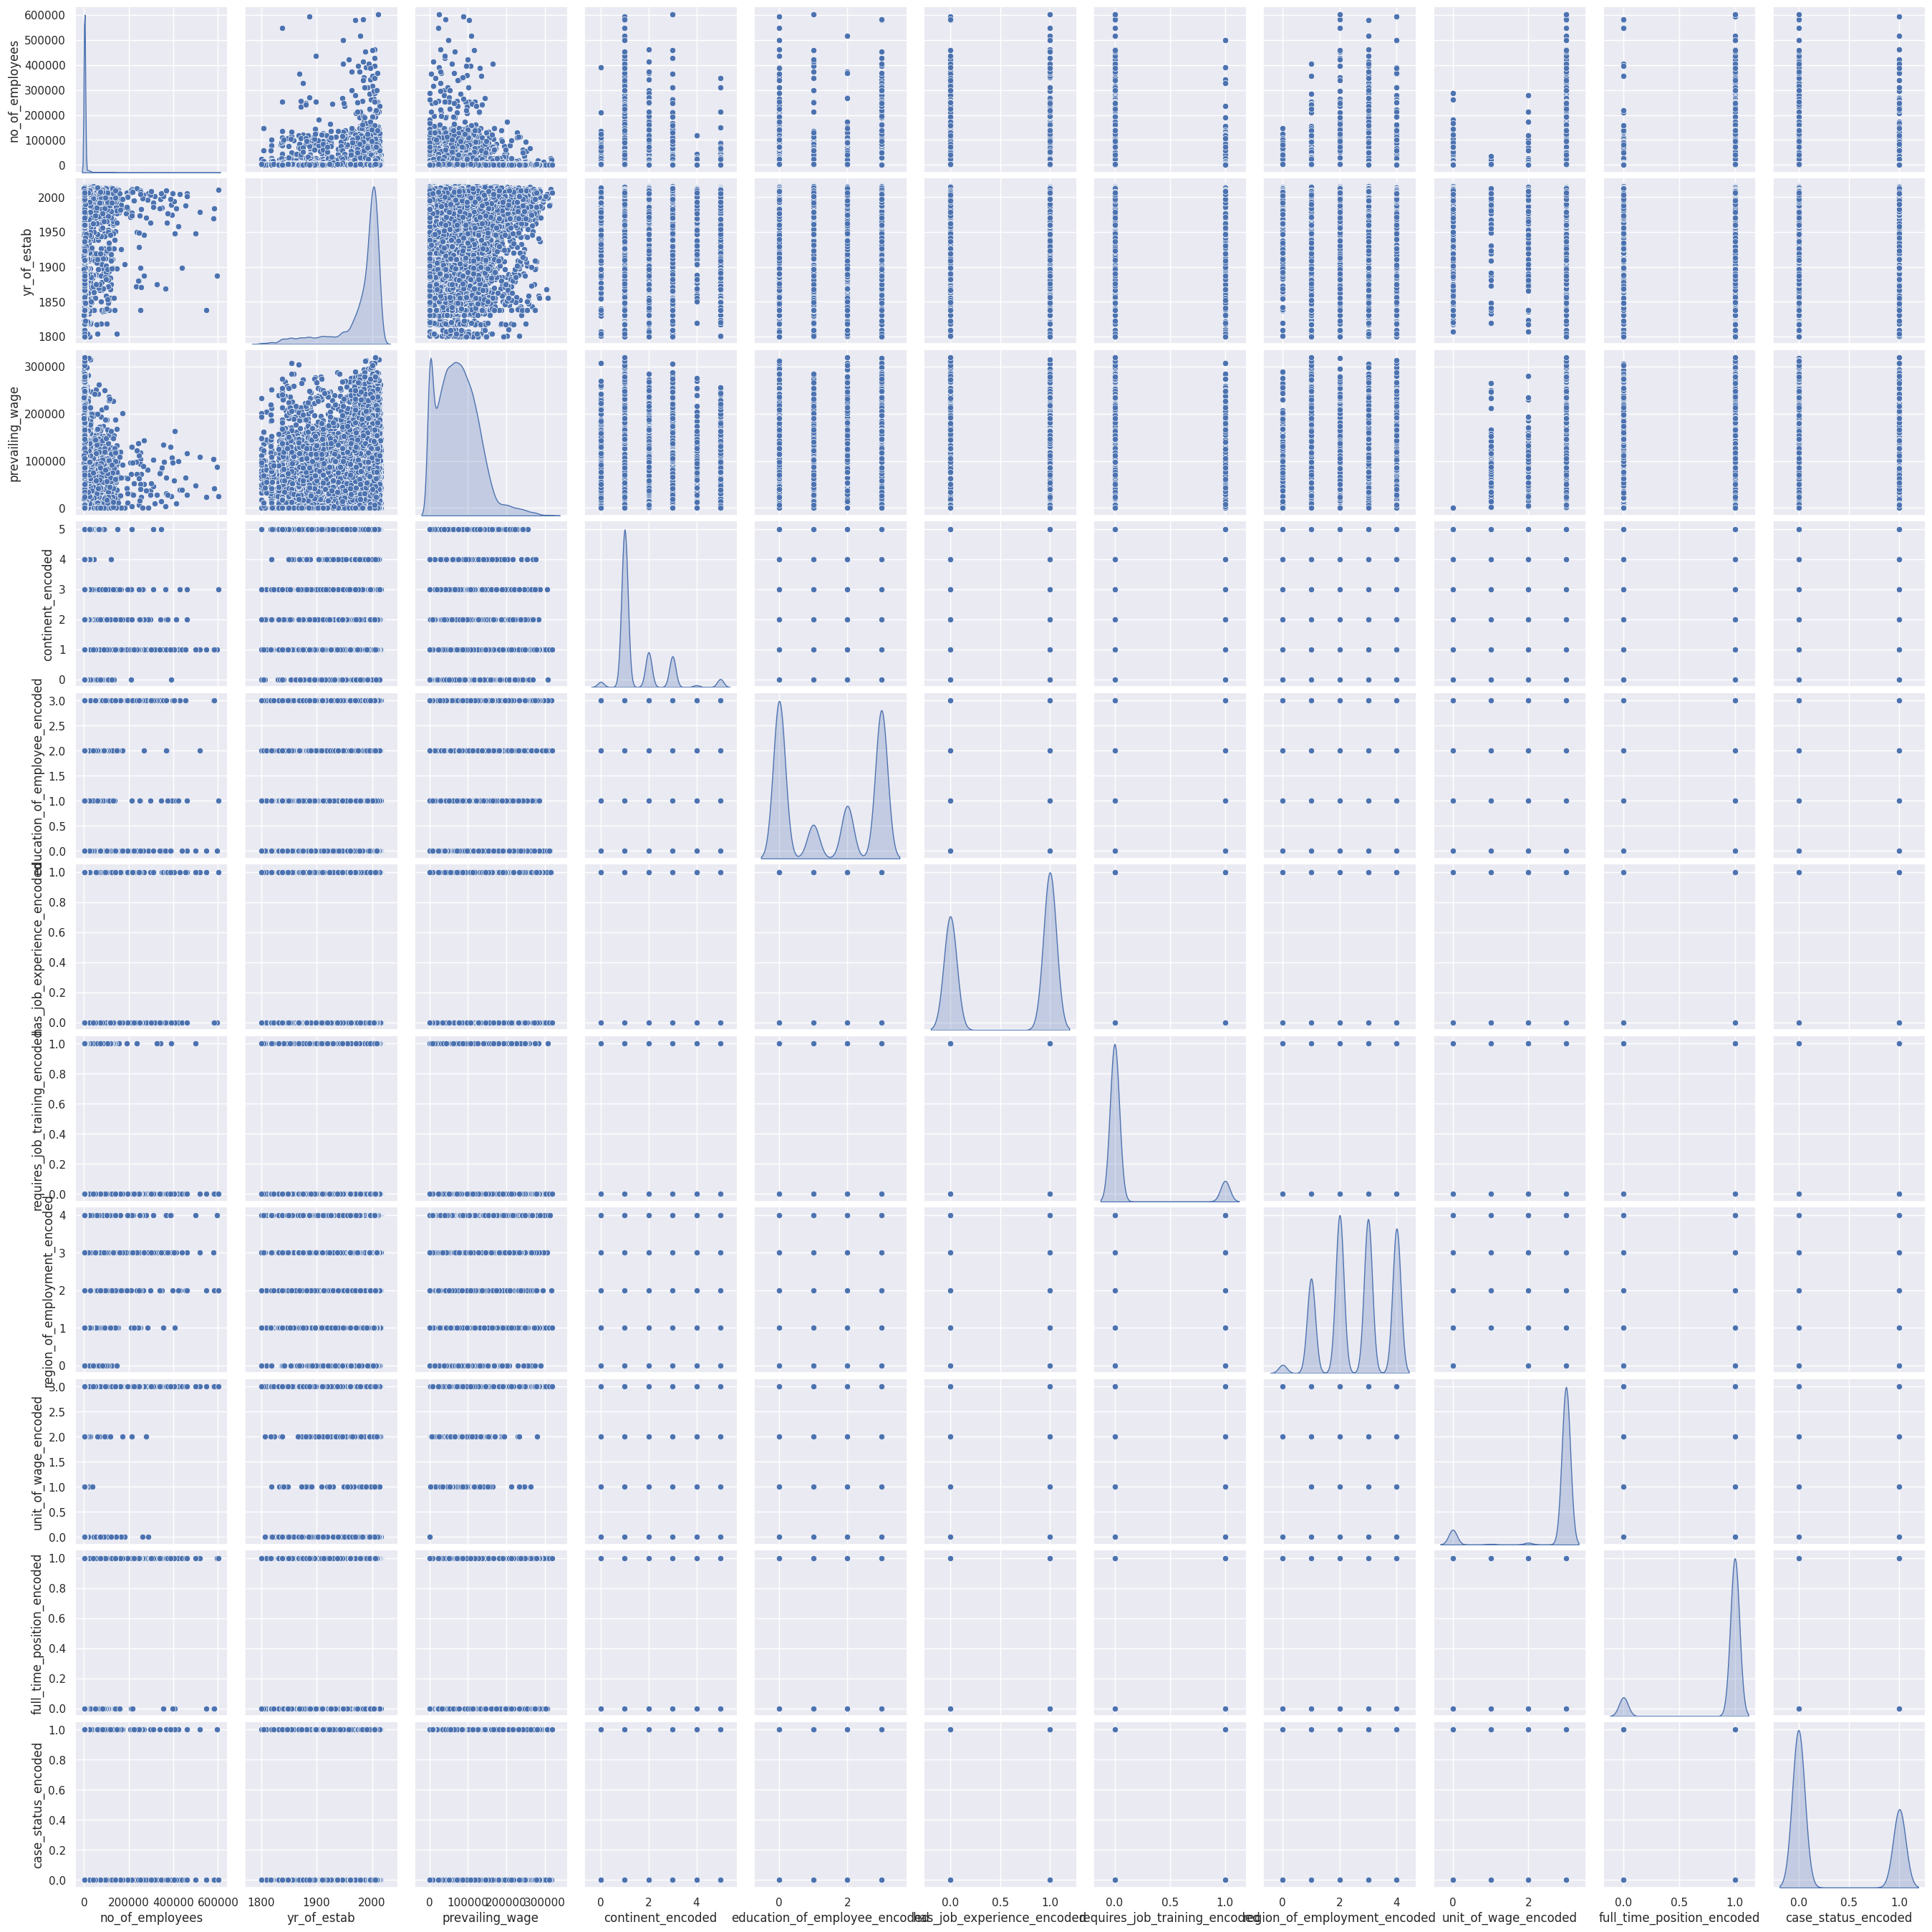

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the pairplot
sns.set(rc={'figure.figsize':(16,10)})

# Create pairplot for all numeric columns to check correlations
sns.pairplot(df, kind='scatter', diag_kind='kde')  # diag_kind='kde' for KDE plots on diagonals

# Show the plot
plt.show()

Now that all of the non-numeric columns have been encoded, we have a wider picture. Though still, the columns seem to have low correlation to each other. The strongest correlation we see is between unit of wage encoded and prevailing wage, with a correlation coefficient of .46.

Answering Leading Questions

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
With a correlation coefficient of -.1 there does not seem to be a strong correlation.

How does the visa status vary across different continents?
There seems to be high variability, which can be gathered from the low correlation, .018.

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
Due to the low correlation of -.19, one could assue that work experience does not highly affect visa status.

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? From the code below, Yearly has the highest proportion of candidates that get approved.

The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
There seems to be a low correlation between prevailing wage and visa status, with a correlation coefficient of -.076.

In [ ]:
#In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).unstack()

case_status,Certified,Denied
unit_of_wage,,
Hour,0.346314,0.653686
Month,0.617978,0.382022
Week,0.621324,0.378676
Year,0.698850,0.301150


## Data Preprocessing

- Missing value treatment (if needed)
  - There were not any missing values in the original data
- Feature engineering
  - There were edits made to label encode columns that were not numerical in order to see the correlation between the two.
- Outlier detection and treatment (if needed)
  - I do not believe treatment is needed here due to there not being any data qualty concerns
- Preparing data for modeling
  - Will prepare for modeling
- Any other preprocessing steps (if needed)

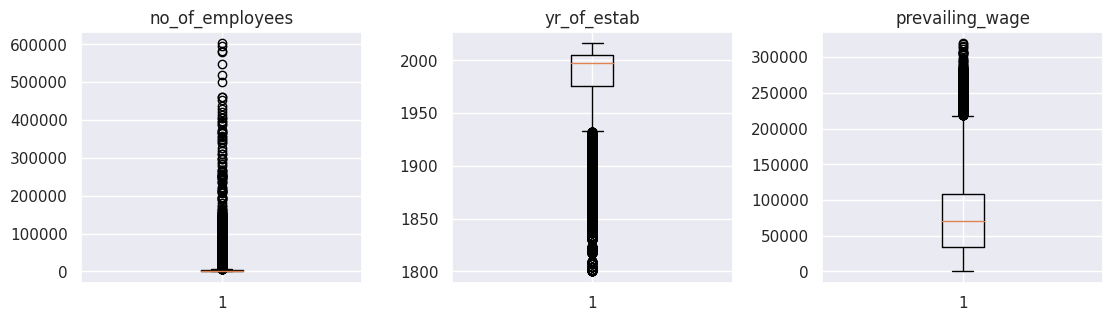

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Actions for Pre-Processing Data

There are not any columns that I deem that need to be removed.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Separating features and the target column
X = df.drop('case_status_encoded', axis=1)
#In order to change the data from objects to numeric values for the model
X = X.select_dtypes(include=[np.number])
y = df['case_status_encoded']

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((17836, 10), (7644, 10))

- We have 17836 observations in the train set and 7644 observations in the test set.

## Building bagging and boosting models

BAGGING

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)

# Train the classifier
dtree.fit(X_train, y_train)

# Function to evaluate classification model performance
def model_performance_classification(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

# Evaluate the model's training performance
dtree_model_train_perf = model_performance_classification(dtree, X_train, y_train)
print("Training performance \n", dtree_model_train_perf)

# Evaluate the model's testing performance
dtree_model_test_perf = model_performance_classification(dtree, X_test, y_test)
print("Testing performance \n", dtree_model_test_perf)


Training performance 
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'Confusion Matrix': array([[11836,     0],
       [    0,  6000]])}
Testing performance 
 {'Accuracy': 0.663003663003663, 'Precision': 0.6670937215315914, 'Recall': 0.663003663003663, 'F1 Score': 0.6649102493171122, 'Confusion Matrix': array([[3838, 1344],
       [1232, 1230]])}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the base classifier (e.g., DecisionTreeClassifier)
dtree = DecisionTreeClassifier(random_state=1)

# Initialize the BaggingClassifier with the base classifier
bagging_clf = BaggingClassifier(base_estimator=dtree, random_state=1)

# Parameter grid for model tuning
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best estimator (model with the best hyperparameters)
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Evaluate the best model on the training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print(f"Training accuracy: {train_accuracy:.4f}")

# Evaluate the best model on the testing set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Testing accuracy: {test_accuracy:.4f}")


Best hyperparameters found:  {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 70}
Training accuracy: 0.9985
Testing accuracy: 0.7323


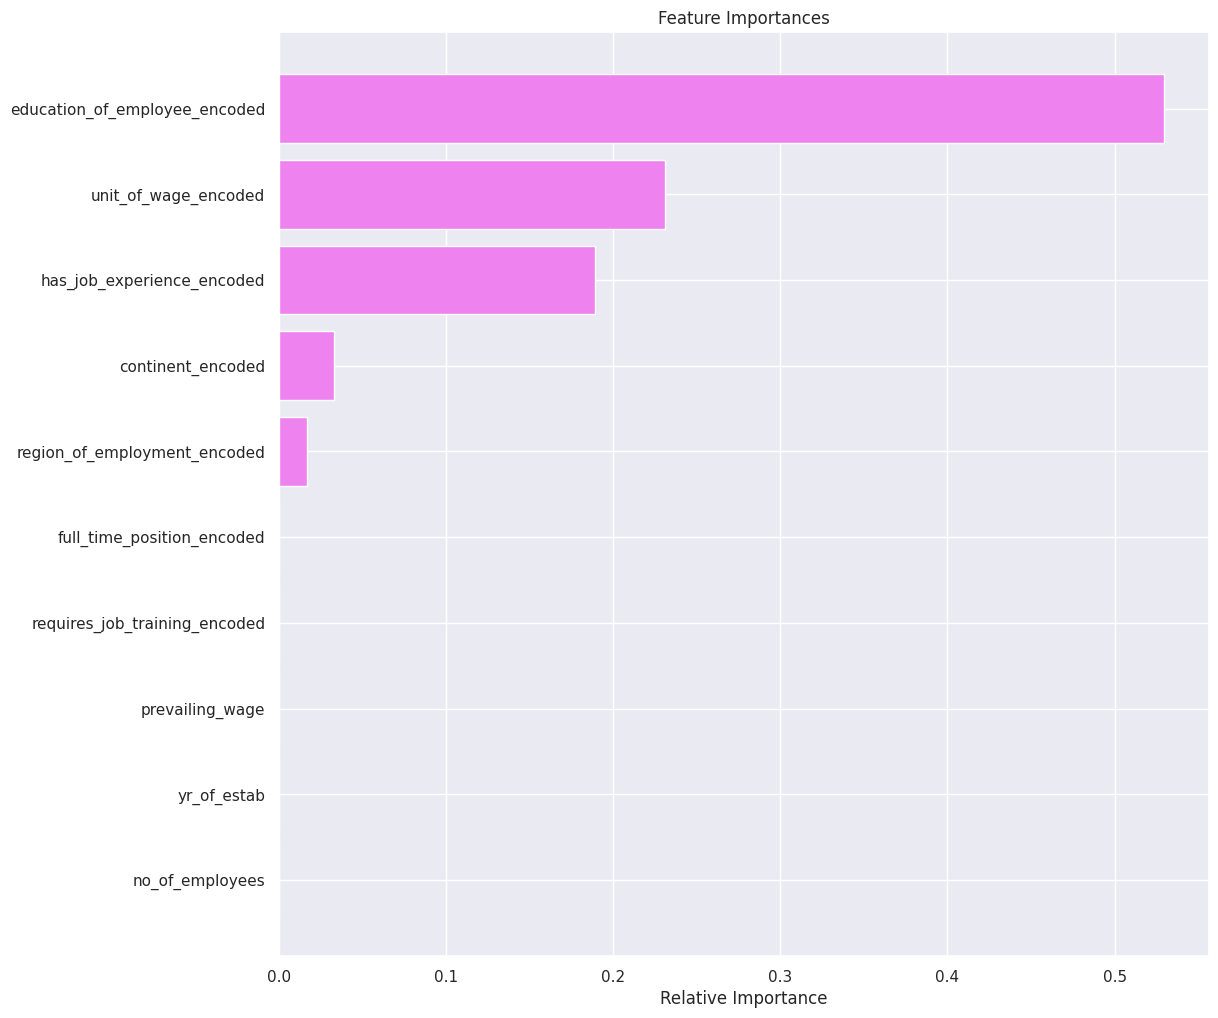

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

With the decsion tree model, with the adjusted parameters there has been an increase in testing accuracy by about 11%. Education of employees, units of pay and having job expierence seem to be the high contributors to whether someone will get their visa approved or not.

Bagging Classifier

In [ ]:
# Import required libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # or any other base estimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Example dataset


# Define the base model (e.g., DecisionTreeClassifier or any other classifier)
base_estimator = DecisionTreeClassifier()

# Initialize the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# If you want to check feature importances (if using tree-based methods like DecisionTreeClassifier)
if hasattr(base_estimator, "feature_importances_"):
    importances = bagging_clf.estimators_[0].feature_importances_
    print("Feature Importances: ", importances)

Accuracy: 0.7233


In [ ]:
# Initialize the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Parameter grid for tuning
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

# Initialize GridSearchCV to tune parameters
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best estimator (model with the best combination of parameters)
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.4f}")

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Tuned Model Accuracy: 0.7292
Best parameters found:  {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 70}


There was a slight increase in testing accuracy, the biggest contributors according to this

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the RandomForestClassifier
rf_estimator = RandomForestClassifier(random_state=1)

# Fit the model
rf_estimator.fit(X_train, y_train)

# Function to evaluate classification model performance
def model_performance_classification(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate model performance on training set
rf_estimator_model_train_perf = model_performance_classification(rf_estimator, X_train, y_train)
print("Training performance \n", rf_estimator_model_train_perf)

# Evaluate model performance on testing set
rf_estimator_model_test_perf = model_performance_classification(rf_estimator, X_test, y_test)
print("Testing performance \n", rf_estimator_model_test_perf)


Training performance 
 {'Accuracy': 0.999943933617403, 'Precision': 0.9999439383539397, 'Recall': 0.999943933617403, 'F1 Score': 0.9999439324652931}
Testing performance 
 {'Accuracy': 0.7348246991104134, 'Precision': 0.7235239139777, 'Recall': 0.7348246991104134, 'F1 Score': 0.7253492075205131}


In [ ]:

# Initialize the RandomForestClassifier for tuning
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 110, 150],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [0.3, 0.5, 0.6, 'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations (using accuracy for classification)
scorer = 'accuracy'

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

# Evaluate tuned model performance on training set
rf_tuned_model_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print("Tuned Training performance \n", rf_tuned_model_train_perf)

# Evaluate tuned model performance on testing set
rf_tuned_model_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
print("Tuned Testing performance \n", rf_tuned_model_test_perf)


Tuned Training performance 
 {'Accuracy': 0.8099910293787845, 'Precision': 0.8078088273021505, 'Recall': 0.8099910293787845, 'F1 Score': 0.8020190661832943}
Tuned Testing performance 
 {'Accuracy': 0.7435897435897436, 'Precision': 0.7317923123723945, 'Recall': 0.7435897435897436, 'F1 Score': 0.7313735599633452}


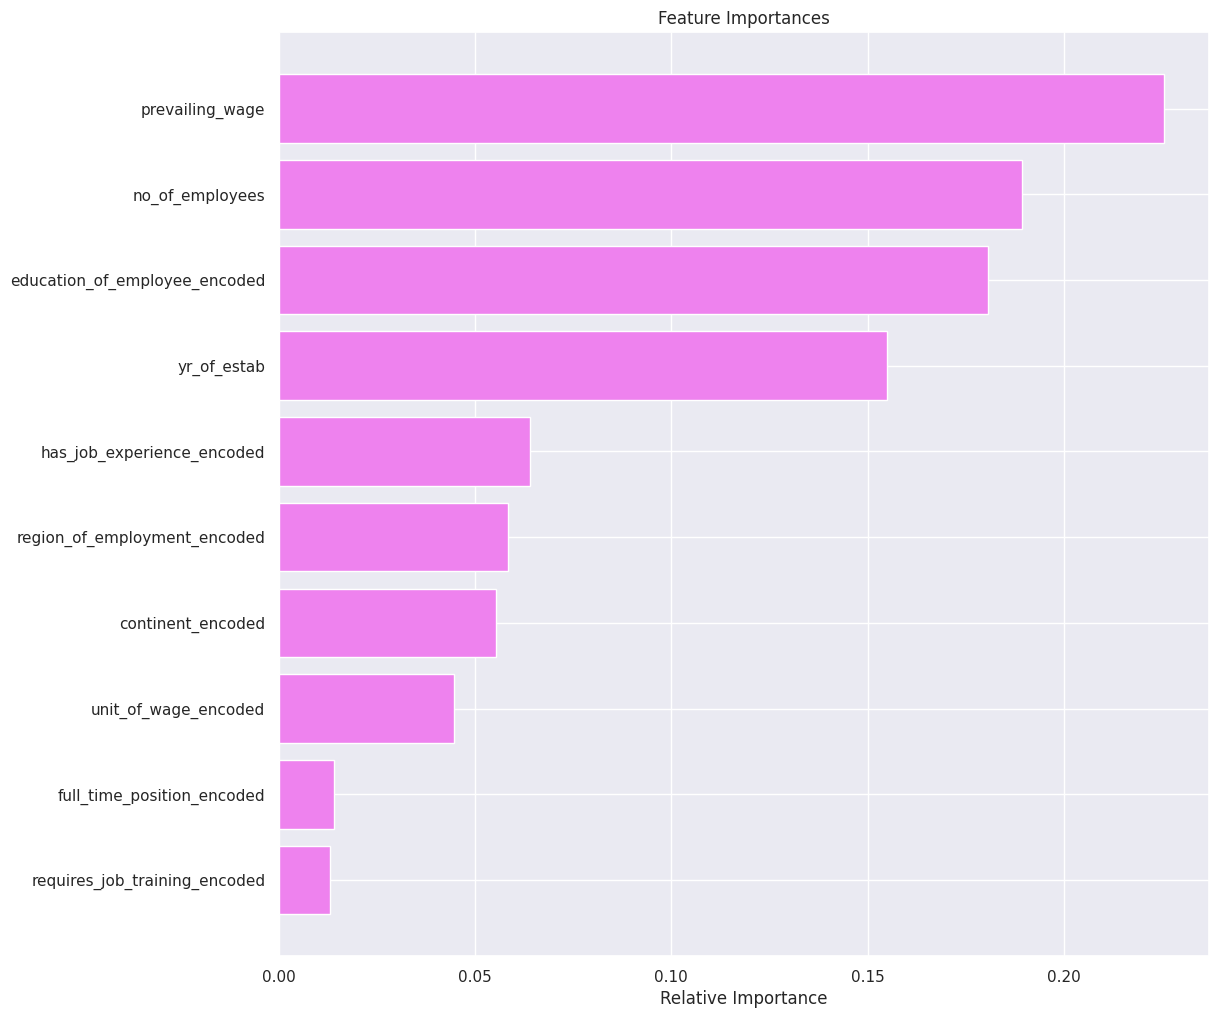

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

There was a .09 difference between the testing accuracy before adn after the parameters. This one as well has prevailing wage, number of employees, and education of employees as the most prominent values of determinng whether someone is going to get approved or not.

BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize AdaBoostClassifier
ab_classifier = AdaBoostClassifier(random_state=1)

# Fit the classifier to the training data
ab_classifier.fit(X_train, y_train)

# Function to evaluate classification model performance
def model_performance_classification(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate model performance on the training set
ab_classifier_model_train_perf = model_performance_classification(ab_classifier, X_train, y_train)
print("Training performance \n", ab_classifier_model_train_perf)

# Evaluate model performance on the testing set
ab_classifier_model_test_perf = model_performance_classification(ab_classifier, X_test, y_test)
print("Testing performance \n", ab_classifier_model_test_perf)


Training performance 
 {'Accuracy': 0.7363758690289303, 'Precision': 0.7256941589734265, 'Recall': 0.7363758690289303, 'F1 Score': 0.7200153811192656}
Testing performance 
 {'Accuracy': 0.7408424908424909, 'Precision': 0.7279346740486708, 'Recall': 0.7408424908424909, 'F1 Score': 0.724097965220405}


In [ ]:
# Initialize AdaBoostClassifier (tuned later with grid search)
ab_classifier = AdaBoostClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# GridSearchCV to tune the parameters
grid_search = GridSearchCV(estimator=ab_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Function to evaluate the classification model performance
def model_performance_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate performance on the training set
train_perf = model_performance_classification(y_train, y_pred_train)
print("Training performance: \n", train_perf)

# Evaluate performance on the test set
test_perf = model_performance_classification(y_test, y_pred_test)
print("Testing performance: \n", test_perf)

# Review the best parameters
print("Best parameters found: ", grid_search.best_params_)

Training performance: 
 {'Accuracy': 0.7543731778425656, 'Precision': 0.745991347355877, 'Recall': 0.7543731778425656, 'F1 Score': 0.7432270335139098}
Testing performance: 
 {'Accuracy': 0.749345892203035, 'Precision': 0.7385809107747884, 'Recall': 0.749345892203035, 'F1 Score': 0.7385014230839789}
Best parameters found:  {'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.1, 'n_estimators': 100}


Feature ranking:
1. education_of_employee_encoded (0.22087722808928334)
2. region_of_employment_encoded (0.15059116538412817)
3. prevailing_wage (0.14188074138165846)
4. no_of_employees (0.13947881201097206)
5. continent_encoded (0.12724125110462725)
6. has_job_experience_encoded (0.07256868238714125)
7. full_time_position_encoded (0.04477932745948831)
8. yr_of_estab (0.04422690687548129)
9. unit_of_wage_encoded (0.03905956767878504)
10. requires_job_training_encoded (0.019296317628434714)


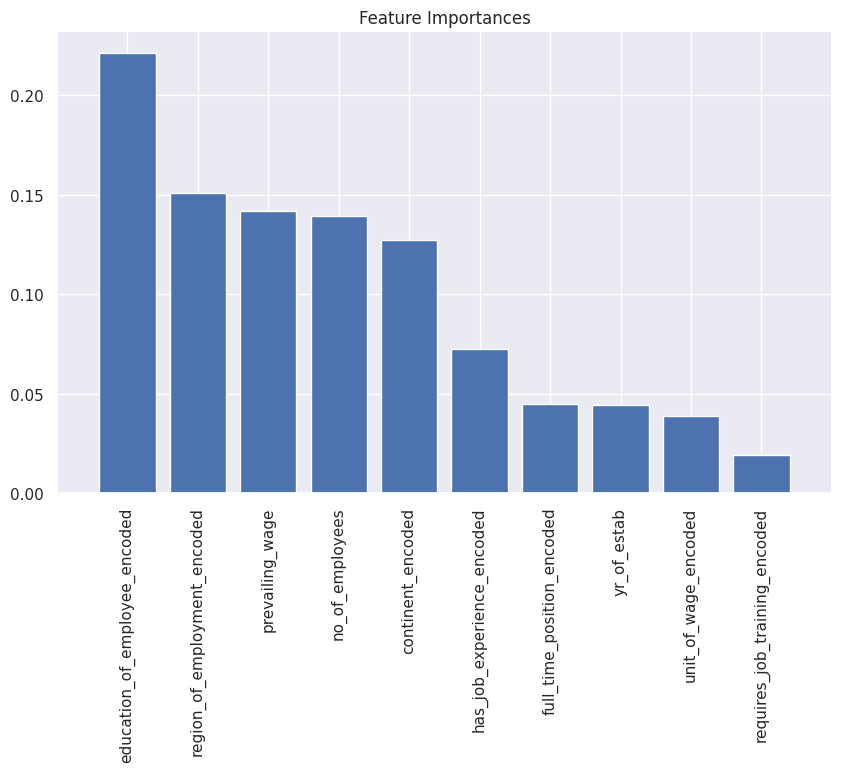

In [ ]:
# Assuming best_model is your trained Gradient Boosting model
importances = best_model.feature_importances_
feature_names = X_train.columns  # If X_train is a DataFrame

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


The accuracy of the testing data has increased by .009, as well as a slightly larger increase in the accuary of the training model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Function to evaluate classification model performance
def model_performance_classification(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate model performance on the training set
gb_classifier_model_train_perf = model_performance_classification(gb_classifier, X_train, y_train)
print("Training performance \n", gb_classifier_model_train_perf)

# Evaluate model performance on the test set
gb_classifier_model_test_perf = model_performance_classification(gb_classifier, X_test, y_test)
print("Testing performance \n", gb_classifier_model_test_perf)


Training performance 
 {'Accuracy': 0.7554945054945055, 'Precision': 0.747249162911433, 'Recall': 0.7554945054945055, 'F1 Score': 0.7444173217211264}
Testing performance 
 {'Accuracy': 0.749345892203035, 'Precision': 0.7385108103453524, 'Recall': 0.749345892203035, 'F1 Score': 0.7382761226878941}


In [ ]:
# Import required libraries
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier(random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample": [0.7, 0.9],
    "max_features": [0.5, 0.7, 1],
}

# Set up the GridSearchCV with GradientBoostingClassifier
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator found by grid search
best_gb_classifier = grid_search.best_estimator_

# Evaluate performance on the training set
y_pred_train = best_gb_classifier.predict(X_train)
y_pred_test = best_gb_classifier.predict(X_test)

# Function to evaluate classification model performance
def model_performance_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate performance on the training and test sets
train_perf = model_performance_classification(y_train, y_pred_train)
print("Training performance: \n", train_perf)

test_perf = model_performance_classification(y_test, y_pred_test)
print("Testing performance: \n", test_perf)

# Output the best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)


Training performance: 
 {'Accuracy': 0.7543171114599686, 'Precision': 0.7459731598935246, 'Recall': 0.7543171114599686, 'F1 Score': 0.7425530107793241}
Testing performance: 
 {'Accuracy': 0.75, 'Precision': 0.7390548282766495, 'Recall': 0.75, 'F1 Score': 0.7382513829527316}
Best parameters found:  {'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': 100, 'subsample': 0.9}


Feature ranking:
1. education_of_employee_encoded (0.22087722808928334)
2. region_of_employment_encoded (0.15059116538412817)
3. prevailing_wage (0.14188074138165846)
4. no_of_employees (0.13947881201097206)
5. continent_encoded (0.12724125110462725)
6. has_job_experience_encoded (0.07256868238714125)
7. full_time_position_encoded (0.04477932745948831)
8. yr_of_estab (0.04422690687548129)
9. unit_of_wage_encoded (0.03905956767878504)
10. requires_job_training_encoded (0.019296317628434714)


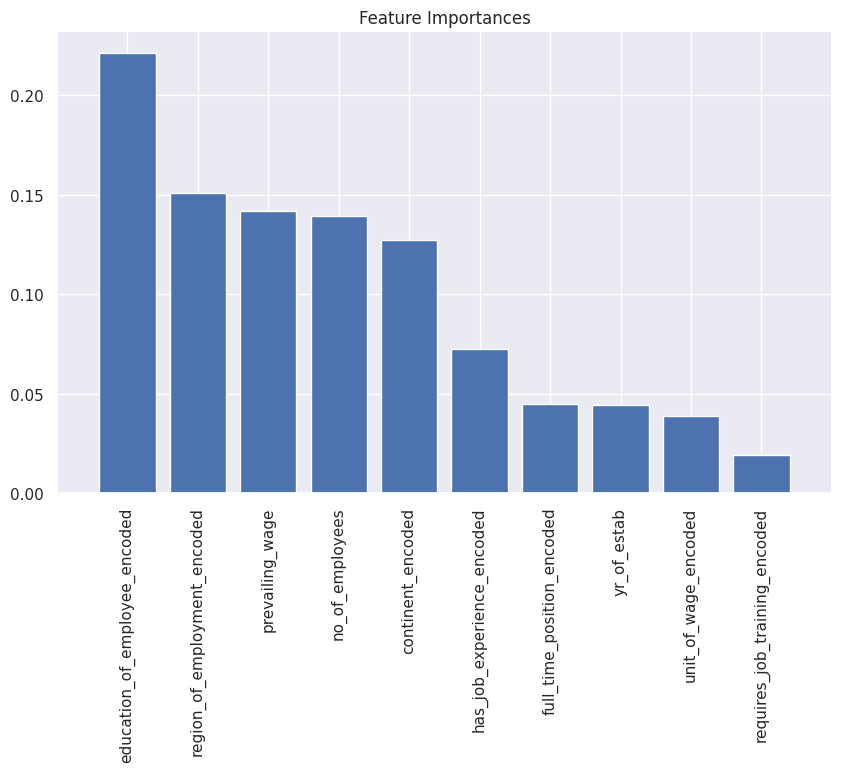

In [ ]:
# Assuming best_model is your trained Gradient Boosting model
importances = best_model.feature_importances_
feature_names = X_train.columns  # If X_train is a DataFrame

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

## Model Performance Comparison and Conclusions

In [ ]:
The boosting models have the best accuracy, they all level out around 75% when it comes to testing data.


## Actionable Insights and Recommendations

In [ ]:
I would recommend using the education, region, prevailing wage, and number of employees as the most important features. They could market towards people who have at least their bachelors, higher prevailing wages, have are from the northeastern, south and western regions regions,and have a large number of employees.